In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('cars.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
mpg             261 non-null float64
 cylinders      261 non-null int64
 cubicinches    261 non-null object
 hp             261 non-null int64
 weightlbs      261 non-null object
 time-to-60     261 non-null int64
 year           261 non-null int64
 brand          261 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 13.3+ KB


In [4]:
X=dataset.iloc[:,:-1].values

In [5]:
X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
X.columns = ['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60', 'year']


c:\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [6]:
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


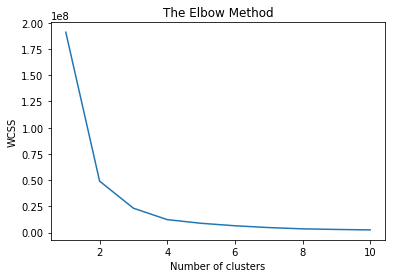

In [7]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

In [9]:
X = X.as_matrix(columns=None)

c:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


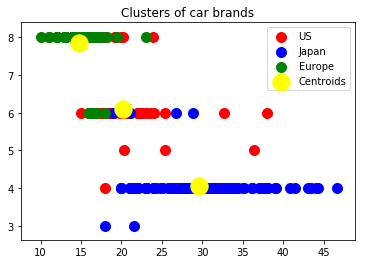

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
y=dataset.iloc[:,7]


In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [15]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [16]:
y_hc = hc.fit_predict(X)

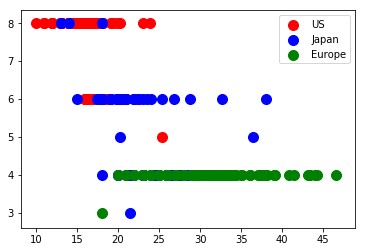

In [18]:
plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=100, c='red',label='US')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=100, c='blue',label='Japan')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=100, c='green',label='Europe')
#plt.scatter(hc.cluster_centers_[:,0],hc.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
#plt.title('Clusters of car brands')
plt.legend()
plt.show()

In [36]:
import matplotlib.pylab as plt
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

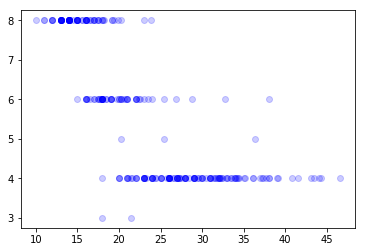

In [98]:
fig = plt.figure()
plt.plot(X[:,0],X[:,1],'ob',alpha=0.2)
#fig.set_size_inches(7,7)

In [41]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [44]:
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,14.0,8.0,350.0,165.0,4209.0,12.0,1972.0
1,31.9,4.0,89.0,71.0,1925.0,14.0,1980.0
2,17.0,8.0,302.0,140.0,3449.0,11.0,1971.0
3,15.0,8.0,400.0,150.0,3761.0,10.0,1971.0
4,30.5,4.0,98.0,63.0,2051.0,17.0,1978.0
5,23.0,8.0,350.0,125.0,3900.0,17.0,1980.0
6,13.0,8.0,351.0,158.0,4363.0,13.0,1974.0
7,14.0,8.0,440.0,215.0,4312.0,9.0,1971.0
8,25.4,5.0,183.0,77.0,3530.0,20.0,1980.0
9,37.7,4.0,89.0,62.0,2050.0,17.0,1982.0


In [48]:
y=dataset.iloc[:,7]

In [92]:
dataset[' brand']=pd.factorize(dataset[' brand'])[0] 

In [54]:
dataset.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [93]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,0
1,31.9,4,89,71,1925,14,1980,1
2,17.0,8,302,140,3449,11,1971,0
3,15.0,8,400,150,3761,10,1971,0
4,30.5,4,98,63,2051,17,1978,0


In [58]:
import seaborn as sb

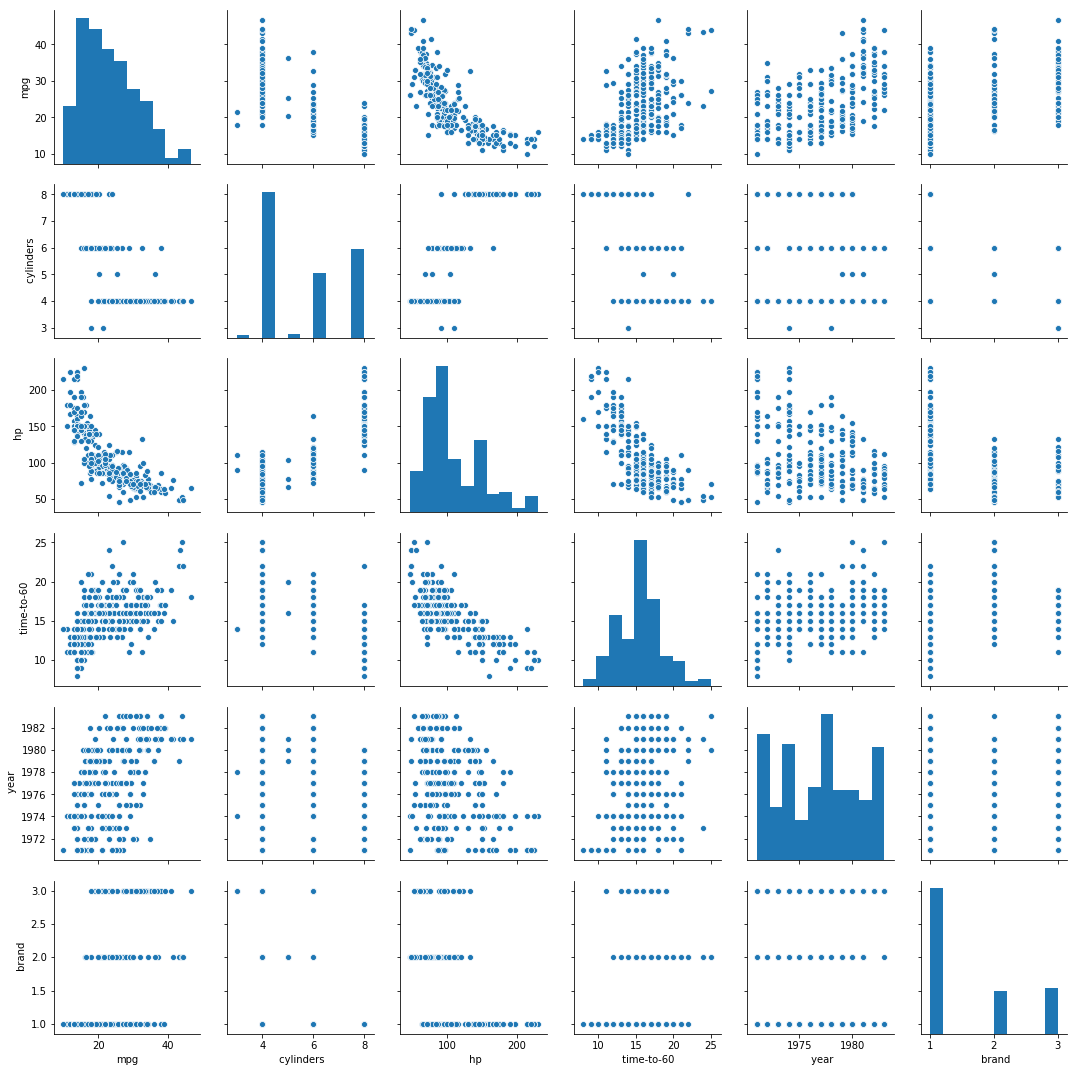

In [60]:
sb.pairplot(dataset)

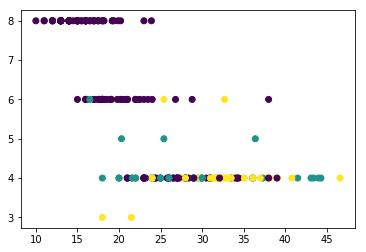

In [100]:
plt.scatter(dataset['mpg'],dataset[' cylinders'],c=dataset[' brand'])